<a href="https://colab.research.google.com/github/aulichney/Deforestation_Results_Analysis/blob/main/PresentationPlots2005_2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import normalize
from collections import OrderedDict
import collections, functools, operator

sns.set_theme(style="whitegrid")

In [2]:
from matplotlib.pyplot import figure
import matplotlib

figure(figsize=(8, 6), dpi=80);

sns.set(font_scale=2)

<Figure size 640x480 with 0 Axes>

In [3]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [4]:
random_forest_score = normalize(np.array([0.56728608, 0.11810299, 0.11731446, 0.06132576, 0.05404054,
       0.03162324, 0.0250689 , 0.02055602, 0.00306878, 0.00161323]))
random_forest_vars = ['rain1', 'n_companies_WOOD PROD', 'emiss_agropec_full',
       'emiss_pec_full', 'n_jobs_AGRICULTURE', 'elevation',
       'n_companies_AGRICULTURE', 'near_mines', 'pib_pc']


lasso_score = normalize(np.array([9.13828511, 5.76315051, 5.56264235, 5.28737915, 4.06404263,
       3.44999191, 3.13790534, 2.86061075, 2.61808745]))
lasso_vars = ['emiss_agropec_full', 'n_companies_AGRICULTURE', 'rain1', 'elevation',
       'near_mines', 'assassination_attempt', 'emiss_agr_full',
       'n_companies_WOOD PROD', 'n_companies_TOTAL INDUSTRIAL']


gradient_boosting_score = normalize([0.11977937, 0.11061045, 0.09813426, 0.09614332, 0.09452444,
       0.02767772, 0.02477007, 0.02326332, 0.02041965])
gradient_boosting_vars = ['rain1', 'near_mines', 'near_roads', 'near_hidrovia', 'elevation',
       'emiss_agropec_full', 'emiss_agr_full', 'emiss_pec_full',
       'n_companies_AGRICULTURE']


random_forest = dict(zip(random_forest_vars, random_forest_score))
lasso = dict(zip(lasso_vars, lasso_score))
gradient_boosting = dict(zip(gradient_boosting_vars, gradient_boosting_score))


In [5]:
dict_list = [random_forest, lasso, gradient_boosting]

In [23]:
all_keys = []
[all_keys.extend(list(el.keys())) for el in dict_list]

[None, None, None]

In [26]:
all_variables = np.unique(all_keys)

In [27]:
dict_list = [random_forest, lasso, gradient_boosting]
for this_dict in dict_list:
  for key in all_variables: 
    if key not in this_dict.keys():
      this_dict[key] = 0

In [34]:
random_forest = OrderedDict(sorted(random_forest.items()))
lasso = OrderedDict(sorted(lasso.items()))
gradient_boosting = OrderedDict(sorted(gradient_boosting.items()))

In [38]:
dict_list = [random_forest, lasso, gradient_boosting]

In [78]:
sum = dict(functools.reduce(operator.add,
         map(collections.Counter, dict_list)))

sum_norm = dict(zip(sum.keys(), normalize(np.array(np.fromiter(sum.values(), dtype=float)).reshape(1, -1))[0]))

dict_list.append(sum_norm)

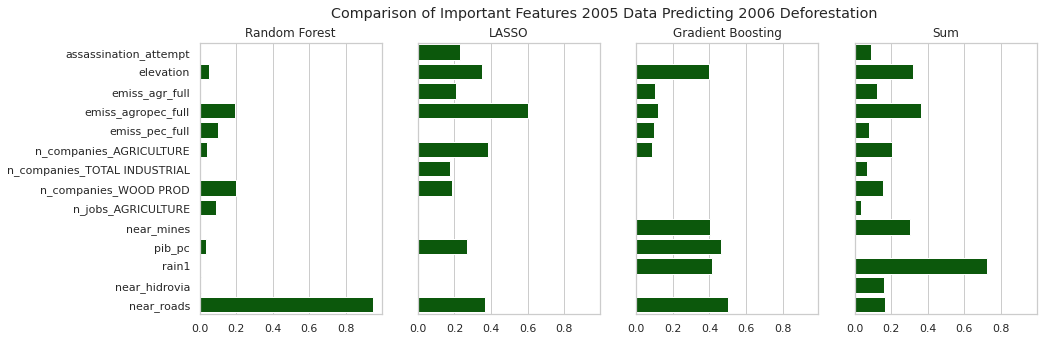

In [80]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Comparison of Important Features 2005 Data Predicting 2006 Deforestation')

title_string_list = ['Random Forest', 'LASSO', 'Gradient Boosting', 'Sum']

for i in range(len(dict_list)):
  D = dict_list[i]
  sns.barplot( ax=axes[i], x =list(D.values()), y = list(D.keys()),color='darkgreen')
  axes[i].set_title(title_string_list[i])

#axes.set( xlabel='Importance')
plt.show()

In [75]:
# Set the figure size

D = random_forest
title_string_list = ['Random Forest', 'LASSO', 'Gradient Boosting', 'Sum']

plt.figure(figsize=(8, 6))

# plot a bar chart
ax = sns.barplot( ax=axes[i], x =list(D.values()), y = list(D.keys()),color='darkgreen')

ax.set( xlabel='Importance')
#plt.title(title_string + ' Feature Importance')

#ax.set_xticklabels(list(D.keys()), rotation = 45)
plt.show()

<Figure size 576x432 with 0 Axes>